This notebook is used for plotting the hydathode size distribution.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind
from statannot import add_stat_annotation


### Plot measurement based on condtions:

In [2]:
# this is the concat csv for all measurement (10 per sample)
size_df = pd.read_csv('size.csv')

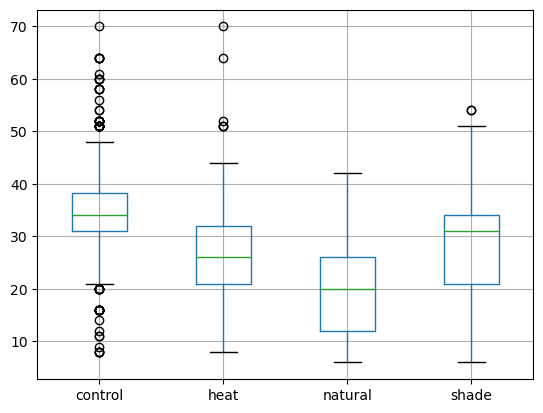

In [3]:
size_df.boxplot(column=['control', 'heat', 'natural',"shade"])  
plt.show()

In [4]:
# leaf length of each leaf:
length_df = pd.read_csv('leaf_length.csv')

In [5]:
length_df.head()

,sample,petiole to tip
0,C1-001,882.960
1,C1-002,1162.704
2,C1-003,1305.689
3,C1-004,1433.476
4,C1-005,1316.055


### Sample mean calculation:

In [6]:
length_dict = pd.read_csv('leaf_length.csv',  index_col=0).to_dict()['petiole to tip']
samples_df = pd.read_csv('samples.csv', header = None)

In [7]:
samples_df.columns = ['sample', 'condition']
samples_df.index = samples_df['sample']
samples_df['length'] = ''
samples_df['mean_size'] = ''

In [8]:
for sample in samples_df.index:

    sample_csv = pd.read_csv(f'size_csvs/{sample}.csv')

    samples_df['mean_size'][sample] = sample_csv['Area'].mean()

    if sample in length_dict.keys():
        samples_df['length'][sample]  = float(length_dict[sample])
    else:
        samples_df = samples_df.drop(index = sample)

In [9]:
samples_df['normalized_size'] = samples_df['mean_size'] /(samples_df['length']**2) * 1000000 ## normalized by length squared

In [10]:
samples_df.head()

,sample,condition,length,mean_size,normalized_size
sample,,,,,
C1-001,C1-001,control,882.96,34.8,44.637225
C1-002,C1-002,control,1162.704,35.0,25.889861
C1-003,C1-003,control,1305.689,44.6,26.161062
C1-004,C1-004,control,1433.476,46.7,22.726682
C1-005,C1-005,control,1316.055,39.5,22.805995


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

natural v.s. heat: t-test independent samples with Bonferroni correction, P_val=8.034e-05 stat=-4.777e+00
shade v.s. control: t-test independent samples with Bonferroni correction, P_val=2.258e-03 stat=-3.657e+00
natural v.s. shade: t-test independent samples with Bonferroni correction, P_val=9.279e-06 stat=-5.348e+00
heat v.s. control: t-test independent samples with Bonferroni correction, P_val=3.105e-03 stat=-3.575e+00


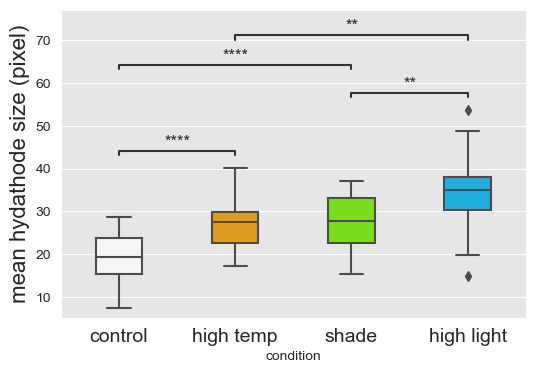

In [11]:
colors = ['whitesmoke', 'orange', 'lawngreen', 'deepskyblue']
order = ['natural', 'heat',  'shade', 'control']
x = "condition"
y = "mean_size"
sns.set_palette(sns.color_palette(colors))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

fig, ax = plt.subplots(figsize = (6,4))

ax = sns.boxplot (x = x, y = y, data = samples_df, order = order, width = .4)

ax, test_results = add_stat_annotation(ax, data = samples_df, x=x, y=y, order = order,
                    box_pairs = [('natural', 'heat'), ('shade', 'control'), ('natural', 'shade'), ('control', 'heat')],
                    test='t-test_ind',  
                    text_format='star', 
                    loc='inside', 
                    verbose=2,
                    fontsize= 12)

ax.set_ylabel('mean hydathode size (pixel)', fontsize = 16)
ax.set_xticklabels(['control', 'high temp', 'shade', 'high light'], fontsize = 14)

plt.show()

# fig.savefig('hydathode_size.pdf')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

natural v.s. heat: t-test independent samples with Bonferroni correction, P_val=1.050e-08 stat=-7.352e+00
heat v.s. shade: t-test independent samples with Bonferroni correction, P_val=1.244e-06 stat=5.917e+00
heat v.s. control: t-test independent samples with Bonferroni correction, P_val=3.696e-06 stat=5.500e+00


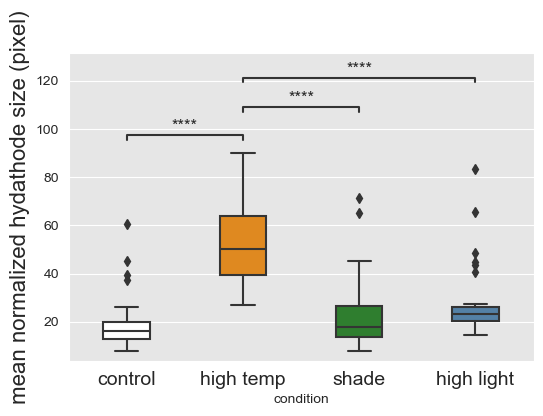

In [12]:
colors = ['white', 'darkorange', 'forestgreen', 'steelblue']
order = ['natural', 'heat',  'shade', 'control']
x = "condition"
y = "normalized_size"
sns.set_palette(sns.color_palette(colors))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

fig, ax = plt.subplots(figsize = (6,4))

ax = sns.boxplot (x = x, y = y, data = samples_df, order = order, width = .4)

ax, test_results = add_stat_annotation(ax, data = samples_df, x=x, y=y, order = order,
                    box_pairs = [('natural', 'heat'), ('heat', 'shade'), ('heat', 'control')],
                    test='t-test_ind',  
                    text_format='star', 
                    loc='inside', 
                    verbose=2,
                    fontsize= 12)

ax.set_ylabel('mean normalized hydathode size (pixel)', fontsize = 16)
ax.set_xticklabels(['control', 'high temp', 'shade', 'high light'], fontsize = 14)

plt.show()

plt.tight_layout()

# fig.savefig('normalized_hydathode_size.pdf')